In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
df=pd.read_csv(r'C:\Users\sk\Downloads\Recent Work\ML_arabic\الدوار-الثامن_english.csv',encoding = 'utf-8')
df

,Accident_ID,Type,Date,the speed,A. Minor injuries,A. Serious injuries,p. death injuries,A. Medium injuries,lanes of the road,road surface,...,the lighting,the weather,Road properties,driver error,Conservative,Vehicle class,accident date,number of vehicles,age of the driver,Driver's gender
0,1523897,shocked,2/1/2017 17:31,40,0,0,0,0,Two directions not separated by a central island,dry,...,Night and road with enough light,Clear,flat straight,There is no,Capital Governorate Amman,mini ride on car,2/1/2017 17:31,2,33.0,Male
1,1523897,shocked,2/1/2017 17:31,40,0,0,0,0,Two directions not separated by a central island,dry,...,Night and road with enough light,Clear,flat straight,The driver should not leave the safe relay dis...,Capital Governorate Amman,mini ride on car,2/1/2017 17:31,2,NaN,in
2,1525376,shocked,6/1/2017 14:30,40,0,0,0,0,One-way,dry,...,day,Clear,flat straight,Driving a vehicle without taking the necessary...,Capital Governorate Amman,mini ride on car,6/1/2017 14:30,2,23.0,Male
3,1525376,shocked,6/1/2017 14:30,40,0,0,0,0,One-way,dry,...,day,Clear,flat straight,There is no,Capital Governorate Amman,mini ride on car,6/1/2017 14:30,2,34.0,Male
4,1526309,shocked,11/1/2017 6:57,40,0,0,0,0,Two-way separated by a central island,dry,...,day,Clear,flat straight,There is no,Capital Governorate Amman,mini ride on car,11/1/2017 6:57,2,35.0,feminine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2582,2546273,shocked,12/28/2021 9:42:00 PM,60,0,0,0,0,Two-way separated by a central island,dry,...,Night and road with enough light,Clear,flat straight,There is no,Capital Governorate Amman,mini ride on car,12/28/2021 9:42:00 PM,2,47.0,Male
2583,2547283,shocked,12/30/2021 7:07:00 PM,60,0,0,0,0,Two-way separated by a central island,dry,...,Night and road with enough light,Clear,flat straight,The driver should not leave the safe relay dis...,Capital Governorate Amman,mini ride on car,12/30/2021 7:07:00 PM,4,45.0,Male
2584,2547283,shocked,12/30/2021 7:07:00 PM,60,0,0,0,0,Two-way separated by a central island,dry,...,Night and road with enough light,Clear,flat straight,There is no,Capital Governorate Amman,mini ride on car,12/30/2021 7:07:00 PM,4,24.0,Male
2585,2547283,shocked,12/30/2021 7:07:00 PM,60,0,0,0,0,Two-way separated by a central island,dry,...,Night and road with enough light,Clear,flat straight,There is no,Capital Governorate Amman,mini ride on car,12/30/2021 7:07:00 PM,4,121.0,feminine


In [90]:
df.shape

(2587, 23)

In [91]:
df.columns

Index(['Accident_ID', 'Type', 'Date', 'the speed', 'A. Minor injuries',
       'A. Serious injuries', 'p. death injuries', 'A. Medium injuries',
       'lanes of the road', 'road surface', 'Vehicle Nationality',
       'category of licenses', 'road type', 'the lighting', 'the weather',
       'Road properties', 'driver error', 'Conservative', 'Vehicle class',
       'accident date', 'number of vehicles', 'age of the driver',
       'Driver's gender'],
      dtype='object')

In [92]:
df.isnull().sum()

Accident_ID               0
Type                      0
Date                      0
the speed                 0
A. Minor injuries         0
A. Serious injuries       0
p. death injuries         0
A. Medium injuries        0
lanes of the road         0
road surface              0
Vehicle Nationality       0
category of licenses      0
road type                 0
the lighting              0
the weather               0
Road properties           0
driver error              0
Conservative              0
Vehicle class             0
accident date             0
number of vehicles        0
age of the driver       381
Driver's gender           0
dtype: int64

In [93]:
quant_features=[feature for feature in df.columns if df[feature].dtype!='O' and len(df[feature].unique())>10 ]
quant_features

['Accident_ID', 'age of the driver']

In [94]:
qual_features=[feature for feature in df.columns if len(df[feature].unique())<10]
qual_features

['Type',
 'the speed',
 'A. Minor injuries',
 'A. Serious injuries',
 'p. death injuries',
 'A. Medium injuries',
 'lanes of the road',
 'road surface',
 'Vehicle Nationality',
 'road type',
 'the lighting',
 'the weather',
 'Road properties',
 'Conservative',
 'Vehicle class',
 'number of vehicles',
 "Driver's gender"]

In [95]:
other_features=[feature for feature in df.columns if feature not in qual_features and feature not in quant_features]
other_features

['Date', 'category of licenses', 'driver error', 'accident date']

In [96]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
numerical_features

['Accident_ID',
 'the speed',
 'A. Minor injuries',
 'A. Serious injuries',
 'p. death injuries',
 'A. Medium injuries',
 'number of vehicles',
 'age of the driver']

In [97]:
for feature in qual_features:
    print(feature)
    print(df[feature].unique())

Type
['shocked' 'Run over' 'Deterioration']
the speed
[40 60 30 50 70 80 20 10]
A. Minor injuries
[0 1 2 4 5]
A. Serious injuries
[0 1]
p. death injuries
[0 1]
A. Medium injuries
[0 1]
lanes of the road
['Two directions not separated by a central island' 'One-way'
 'Two-way separated by a central island' 'inside garage' 'public squares']
road surface
['dry' 'Suffering' 'icy' 'snowy' 'sandy']
Vehicle Nationality
['Jordan' 'Syria' 'Saudi' 'Arab Emirates' 'United State' 'Kuwait' 'Libya'
 'Lebanon' 'Israel']
road type
['asphalt' 'cement' 'earthy']
the lighting
['Night and road with enough light' 'day' 'darkness'
 'Night and insufficient lighting' 'Sunset']
the weather
['Clear' 'rain' 'stormy winds' 'snow']
Road properties
['flat straight' 'Direct Mortaqi' 'straight slope' 'flat curve']
Conservative
['Capital Governorate Amman']
Vehicle class
['mini ride on car' 'joint transfer' 'Shipping' 'medium ride' 'bus'
 'Special Use Vehicle'
 'The head of a locomotive not intended for shipment' 'moto

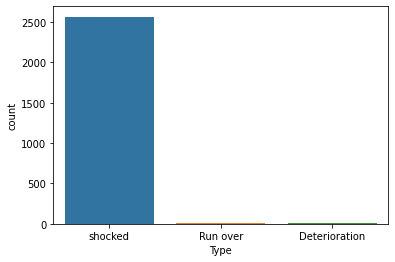

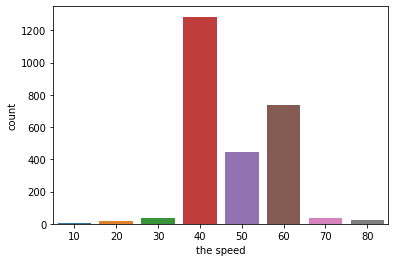

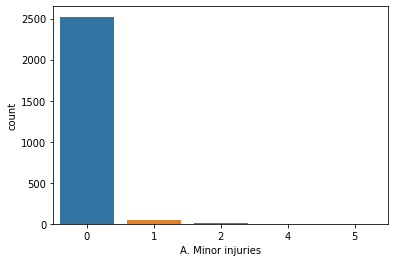

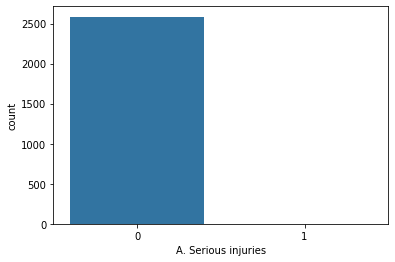

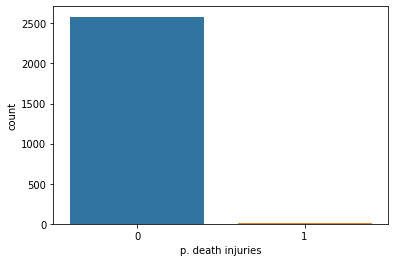

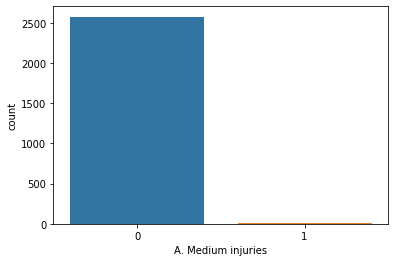

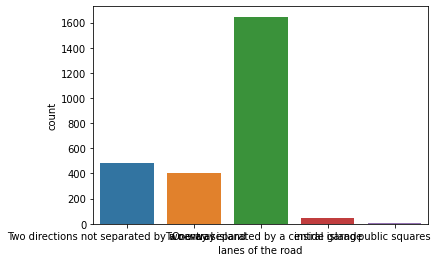

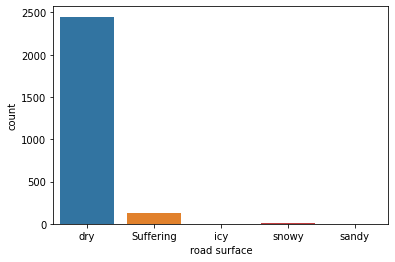

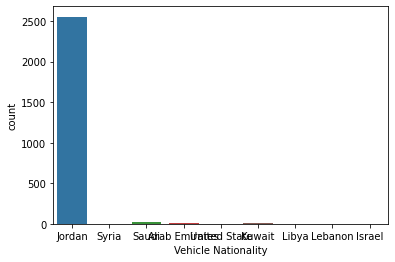

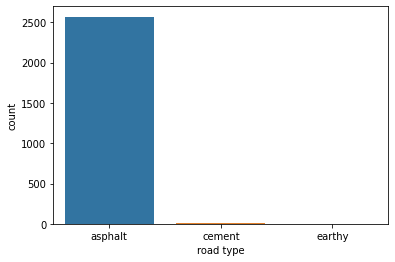

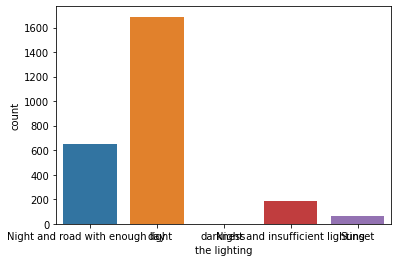

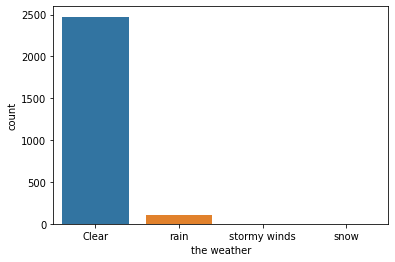

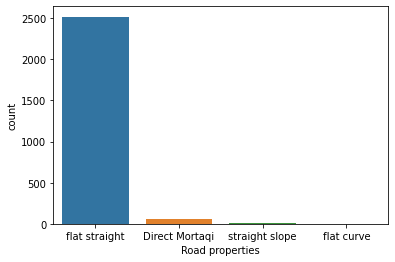

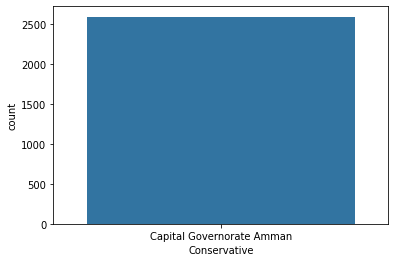

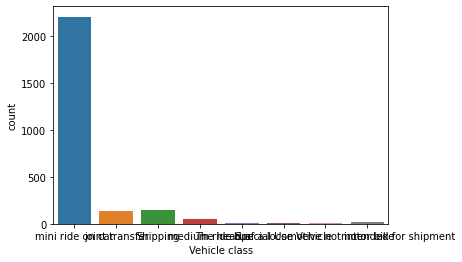

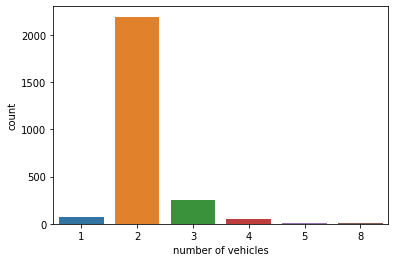

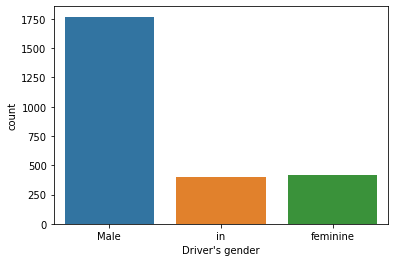

In [98]:
for feature in qual_features:
    sns.countplot(x=feature,data=df)
    plt.show()

In [99]:
len(numerical_features)

8

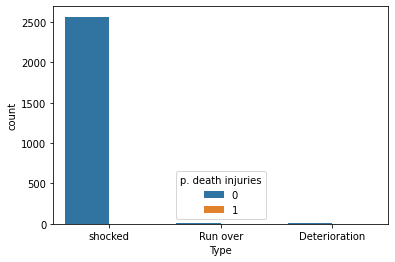

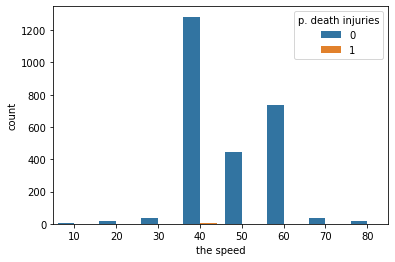

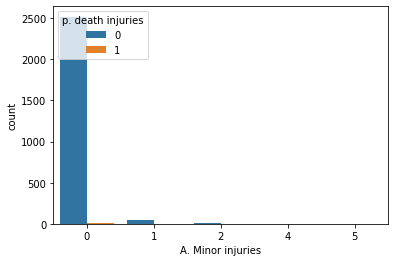

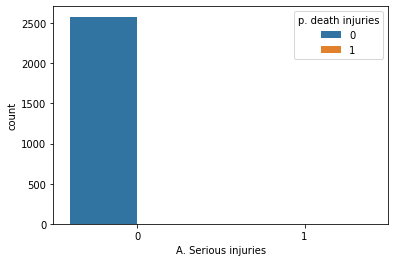

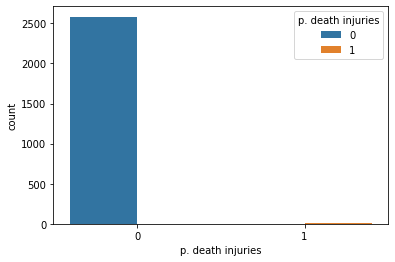

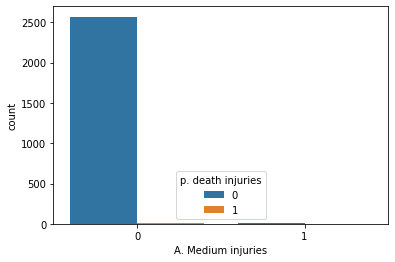

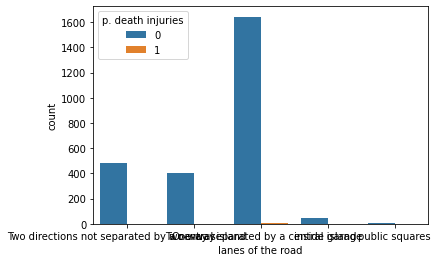

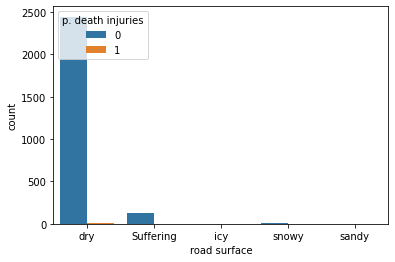

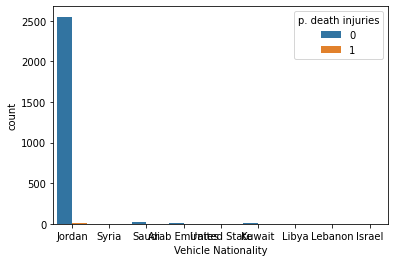

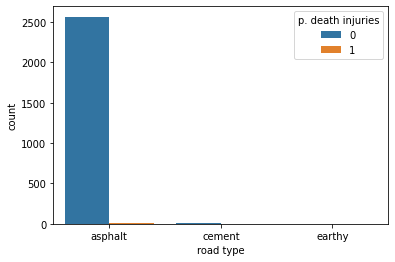

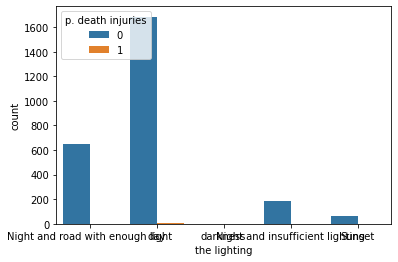

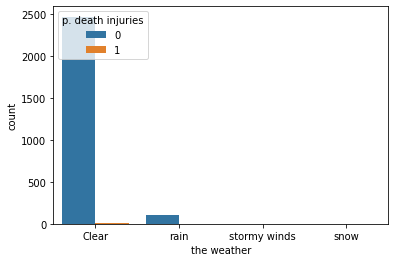

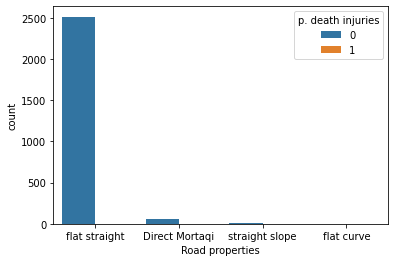

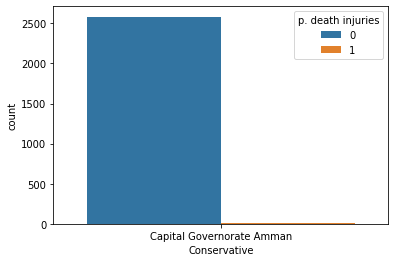

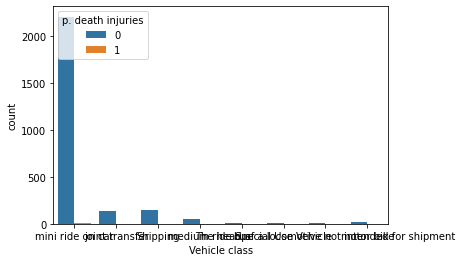

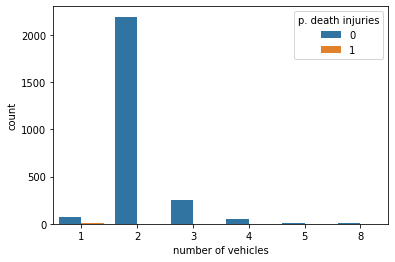

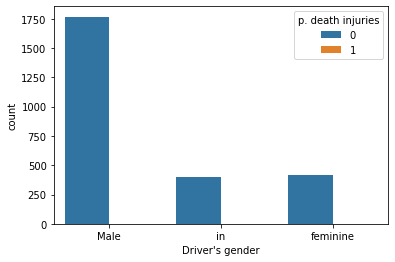

In [100]:
for feature in qual_features:
    sns.countplot(x=feature,hue='p. death injuries',data=df)
    plt.show()

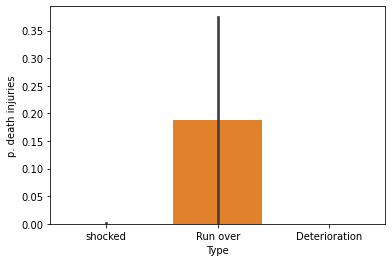

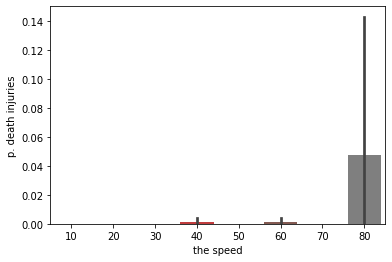

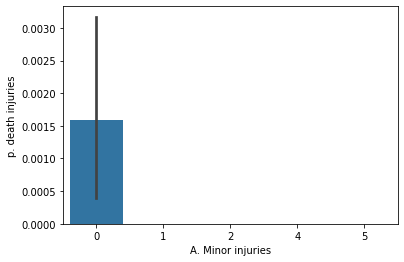

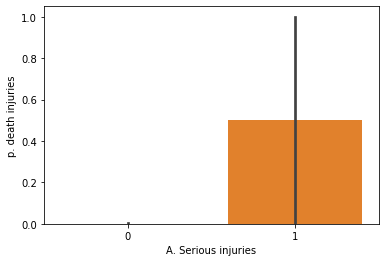

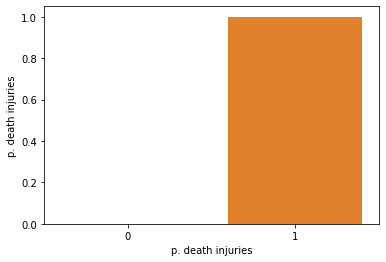

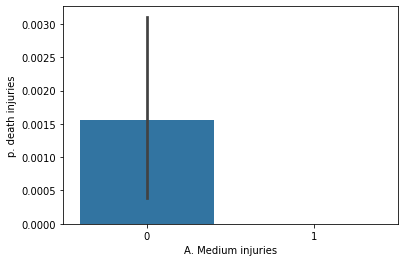

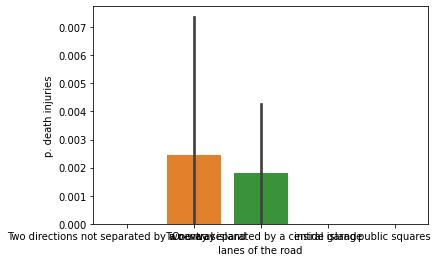

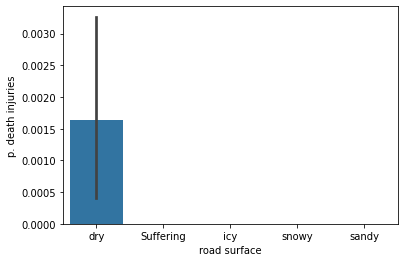

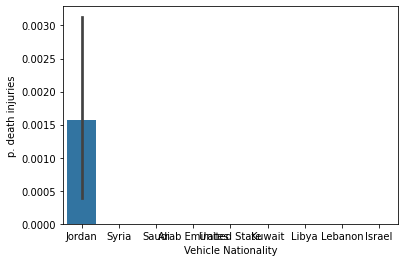

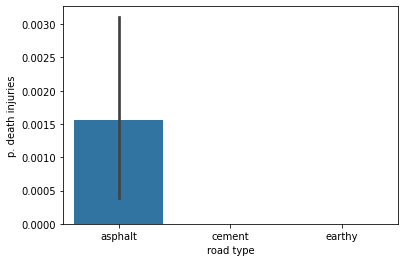

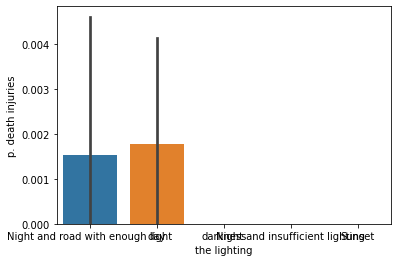

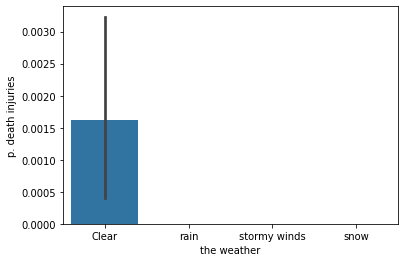

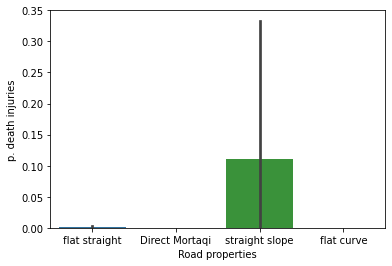

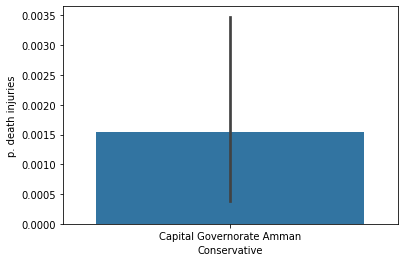

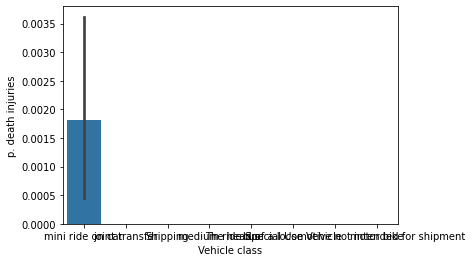

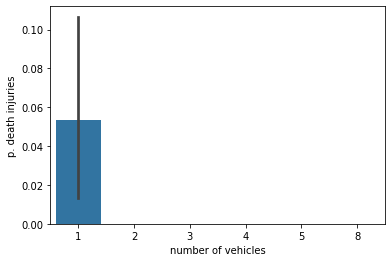

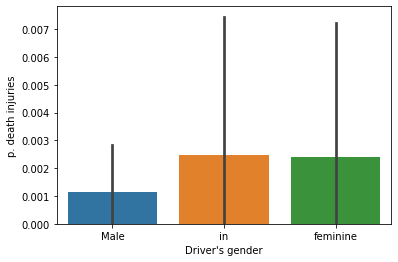

In [101]:
for feature in qual_features:
    sns.barplot(x=feature,y='p. death injuries',data=df)
    plt.show()

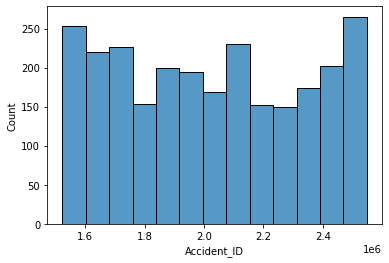

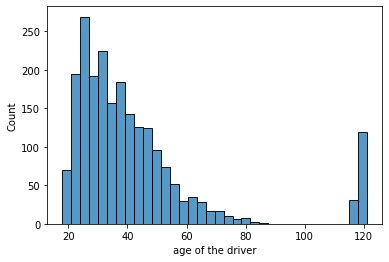

In [102]:
for feature in quant_features:
    sns.histplot(df[feature])
    plt.show()

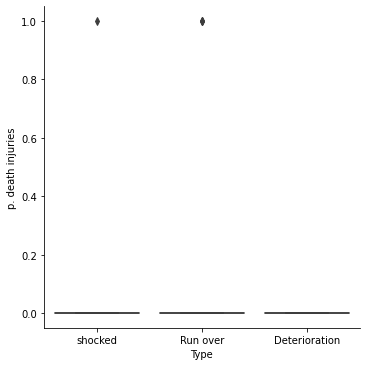

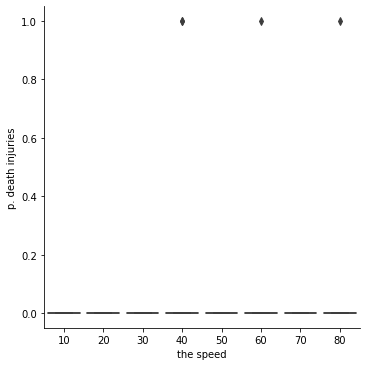

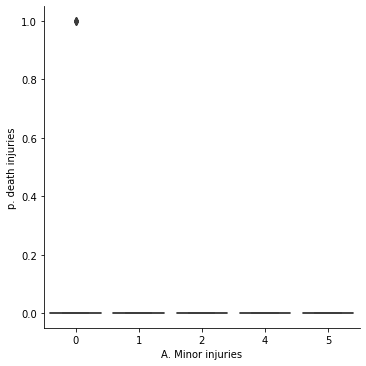

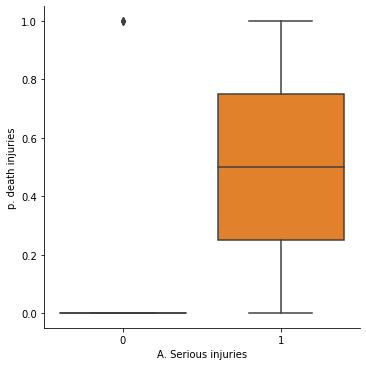

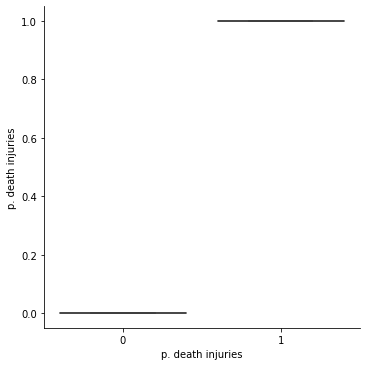

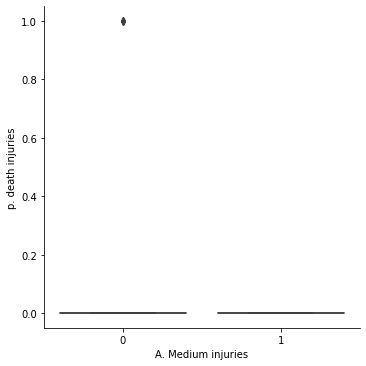

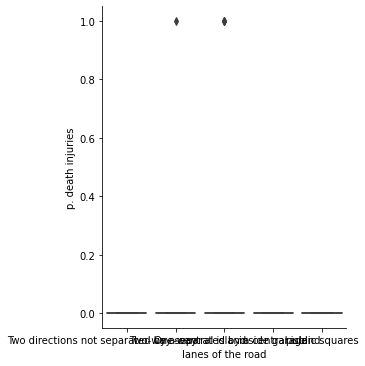

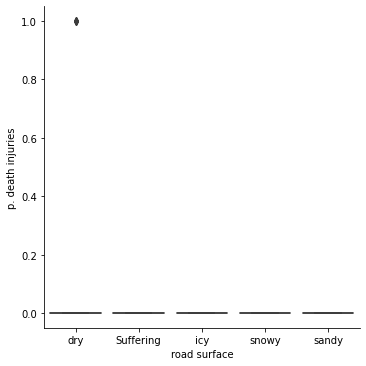

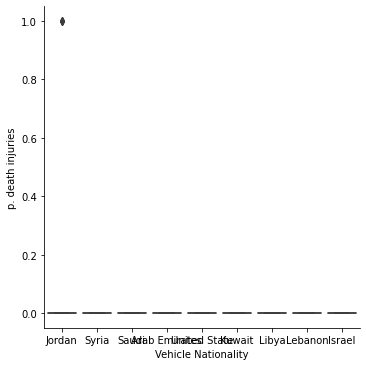

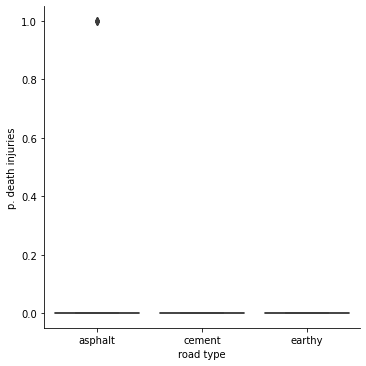

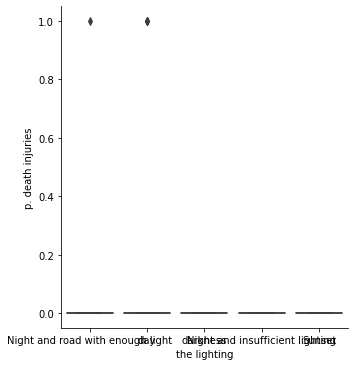

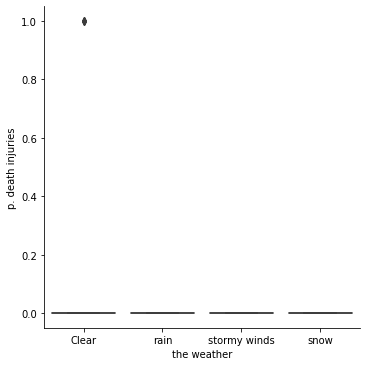

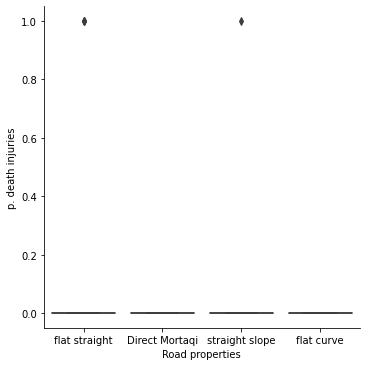

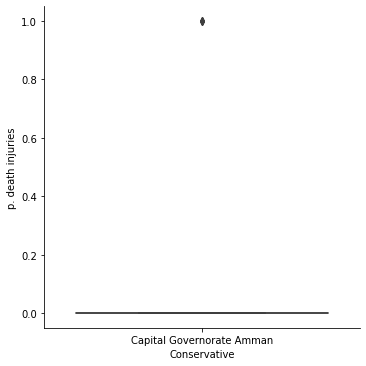

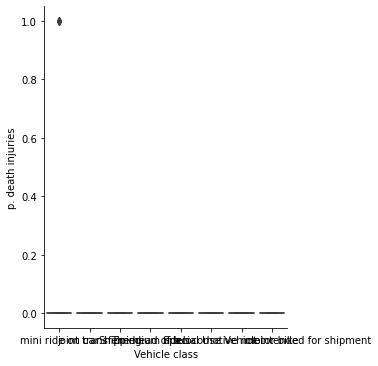

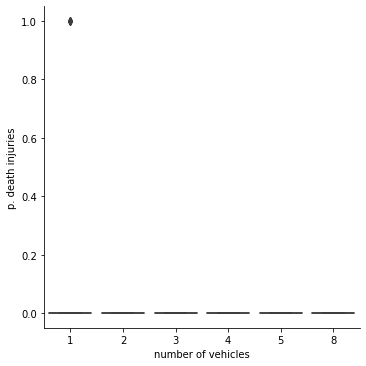

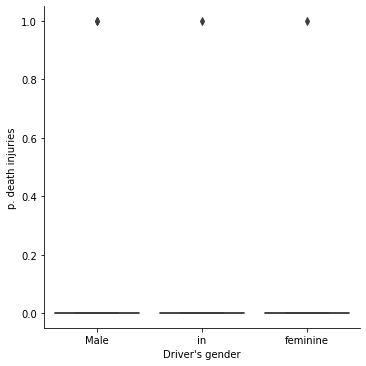

In [103]:
import seaborn as sns
for feature in qual_features:
    sns.catplot(x=feature,y='p. death injuries',data=df,kind='box')


### deriving year,month,date,hour,minute,shift

In [104]:
df['Date']

0              2/1/2017 17:31
1              2/1/2017 17:31
2              6/1/2017 14:30
3              6/1/2017 14:30
4              11/1/2017 6:57
                ...          
2582    12/28/2021 9:42:00 PM
2583    12/30/2021 7:07:00 PM
2584    12/30/2021 7:07:00 PM
2585    12/30/2021 7:07:00 PM
2586    12/30/2021 7:07:00 PM
Name: Date, Length: 2587, dtype: object

In [105]:
df['time']=pd.to_datetime(df['Date']).dt.strftime(date_format = '%I:%M:%S %p')
df['time']

0       05:31:00 PM
1       05:31:00 PM
2       02:30:00 PM
3       02:30:00 PM
4       06:57:00 AM
           ...     
2582    09:42:00 PM
2583    07:07:00 PM
2584    07:07:00 PM
2585    07:07:00 PM
2586    07:07:00 PM
Name: time, Length: 2587, dtype: object

In [106]:
df["month"] = pd.to_datetime(df["Date"]).dt.month
df["month"]

0        2
1        2
2        6
3        6
4       11
        ..
2582    12
2583    12
2584    12
2585    12
2586    12
Name: month, Length: 2587, dtype: int64

In [107]:
df["year"] = pd.to_datetime(df["Date"]).dt.year
df["year"]

0       2017
1       2017
2       2017
3       2017
4       2017
        ... 
2582    2021
2583    2021
2584    2021
2585    2021
2586    2021
Name: year, Length: 2587, dtype: int64

In [108]:
df["date"] = pd.to_datetime(df["Date"]).dt.day
df["date"]

0        1
1        1
2        1
3        1
4        1
        ..
2582    28
2583    30
2584    30
2585    30
2586    30
Name: date, Length: 2587, dtype: int64

In [109]:
df["hour"] = pd.to_datetime(df["time"]).dt.hour
df["hour"]

0       17
1       17
2       14
3       14
4        6
        ..
2582    21
2583    19
2584    19
2585    19
2586    19
Name: hour, Length: 2587, dtype: int64

In [110]:
df["minute"] = pd.to_datetime(df["time"]).dt.minute
df["minute"]

0       31
1       31
2       30
3       30
4       57
        ..
2582    42
2583     7
2584     7
2585     7
2586     7
Name: minute, Length: 2587, dtype: int64

In [111]:
df['time_shift']=df['time'].apply(lambda x:x.split(' ')[1])
df['time_shift']

0       PM
1       PM
2       PM
3       PM
4       AM
        ..
2582    PM
2583    PM
2584    PM
2585    PM
2586    PM
Name: time_shift, Length: 2587, dtype: object

In [112]:
df=df.drop(['time','Date'],axis=1)


In [113]:
df.columns

Index(['Accident_ID', 'Type', 'the speed', 'A. Minor injuries',
       'A. Serious injuries', 'p. death injuries', 'A. Medium injuries',
       'lanes of the road', 'road surface', 'Vehicle Nationality',
       'category of licenses', 'road type', 'the lighting', 'the weather',
       'Road properties', 'driver error', 'Conservative', 'Vehicle class',
       'accident date', 'number of vehicles', 'age of the driver',
       'Driver's gender', 'month', 'year', 'date', 'hour', 'minute',
       'time_shift'],
      dtype='object')

In [114]:
other_features

['Date', 'category of licenses', 'driver error', 'accident date']

In [115]:
df['category of licenses'].unique()

array(['third class', 'third class automatic', 'fourth class',
       'Sixth class (A)', '0', 'Fifth class', 'Sixth class (B)',
       'Sixth Class (A + B)', 'Unidentified/Unidentified Driver',
       'first class', 'Degree'], dtype=object)

In [116]:
df['driver error'].unique()

array(['There is no',
       'The driver should not leave the safe relay distance',
       'Driving a vehicle without taking the necessary traffic safety precautions',
       'Violations of traffic rules and priorities',
       'Suddenly changed leak',
       'The driver of the leaking vehicle suddenly changed',
       'Violation of the no-traffic sign',
       'Non-compliance by the driver with obligatory signs or road signs',
       'Wrong lane change', 'The driver took the wrong lane',
       "The driver's failure to comply with the mandatory signs",
       'Reversing the vehicle that leads to an accident',
       'Opening the vehicle door from the sides or the back while the vehicle is in motion',
       'Failure of the driver to reduce the speed of his vehicle when passing through populated areas or when approaching schools, pedestrian paths, turns or intersections',
       'Failure to comply with the mandatory',
       'Failure to observe the stop sign',
       'Turning or turnin

In [117]:
df['accident date']

0              2/1/2017 17:31
1              2/1/2017 17:31
2              6/1/2017 14:30
3              6/1/2017 14:30
4              11/1/2017 6:57
                ...          
2582    12/28/2021 9:42:00 PM
2583    12/30/2021 7:07:00 PM
2584    12/30/2021 7:07:00 PM
2585    12/30/2021 7:07:00 PM
2586    12/30/2021 7:07:00 PM
Name: accident date, Length: 2587, dtype: object

In [118]:
df=df.drop(['accident date'],axis=1)

### data cleaning

In [119]:
df['age of the driver']=df['age of the driver'].fillna(df['age of the driver'].median())

In [120]:
df["Driver's gender"]=df["Driver's gender"].replace(['in','feminine'],[df["Driver's gender"].mode()[0],'Female'])

In [121]:
df["Driver's gender"].unique()

array(['Male', 'Female'], dtype=object)

In [122]:
df.isnull().sum()

Accident_ID             0
Type                    0
the speed               0
A. Minor injuries       0
A. Serious injuries     0
p. death injuries       0
A. Medium injuries      0
lanes of the road       0
road surface            0
Vehicle Nationality     0
category of licenses    0
road type               0
the lighting            0
the weather             0
Road properties         0
driver error            0
Conservative            0
Vehicle class           0
number of vehicles      0
age of the driver       0
Driver's gender         0
month                   0
year                    0
date                    0
hour                    0
minute                  0
time_shift              0
dtype: int64

### pivat table

In [123]:
x=pd.pivot_table(df,index='p. death injuries',values=quant_features)
x

,Accident_ID,age of the driver
p. death injuries,,
0,2.026471e+06,41.881146
1,1.843579e+06,74.750000


### one hot encoding

In [124]:
non_num_features=[feature for feature in df.columns if df[feature].dtype=='O']
non_num_features

['Type',
 'lanes of the road',
 'road surface',
 'Vehicle Nationality',
 'category of licenses',
 'road type',
 'the lighting',
 'the weather',
 'Road properties',
 'driver error',
 'Conservative',
 'Vehicle class',
 "Driver's gender",
 'time_shift']

In [125]:
for feature in non_num_features:
    print(feature,':')
    print(len(df[feature].unique()))

Type :
3
lanes of the road :
5
road surface :
5
Vehicle Nationality :
9
category of licenses :
11
road type :
3
the lighting :
5
the weather :
4
Road properties :
4
driver error :
56
Conservative :
1
Vehicle class :
8
Driver's gender :
2
time_shift :
2


### one hot encoding

In [126]:
df=pd.get_dummies(df, columns = ["Type"],drop_first=True, prefix="T")

In [127]:
df=pd.get_dummies(df, columns = ["lanes of the road"],drop_first=True, prefix="Lor")

In [128]:
df=pd.get_dummies(df, columns = ["road surface"],drop_first=True, prefix="rs")

In [129]:
df=pd.get_dummies(df, columns = ["Vehicle Nationality"],drop_first=True, prefix="VN")

In [130]:
df=pd.get_dummies(df, columns = ["category of licenses"],drop_first=True, prefix="col")

In [131]:
df=pd.get_dummies(df, columns = ["road type"],drop_first=True, prefix="rt")

In [132]:
df=pd.get_dummies(df, columns = ["the lighting"],drop_first=True, prefix="tl")

In [133]:
df=pd.get_dummies(df, columns = ["the weather"],drop_first=True, prefix="th")

In [134]:
df=pd.get_dummies(df, columns = ["Road properties"],drop_first=True, prefix="rp")

In [135]:
df=pd.get_dummies(df, columns = ["Conservative"],drop_first=True, prefix="con")

In [136]:
df=pd.get_dummies(df, columns = ["Vehicle class"],drop_first=True, prefix="VC")

In [137]:
df=pd.get_dummies(df, columns = ["Driver's gender"],drop_first=True, prefix="Dg")

In [138]:
df=pd.get_dummies(df, columns = ["time_shift"],drop_first=True, prefix="t_sh")

In [139]:
df.columns

Index(['Accident_ID', 'the speed', 'A. Minor injuries', 'A. Serious injuries',
       'p. death injuries', 'A. Medium injuries', 'driver error',
       'number of vehicles', 'age of the driver', 'month', 'year', 'date',
       'hour', 'minute', 'T_Run over', 'T_shocked',
       'Lor_Two directions not separated by a central island',
       'Lor_Two-way separated by a central island', 'Lor_inside garage',
       'Lor_public squares', 'rs_dry', 'rs_icy', 'rs_sandy', 'rs_snowy',
       'VN_Israel', 'VN_Jordan', 'VN_Kuwait', 'VN_Lebanon', 'VN_Libya',
       'VN_Saudi', 'VN_Syria', 'VN_United State', 'col_Degree',
       'col_Fifth class', 'col_Sixth Class (A + B)', 'col_Sixth class (A)',
       'col_Sixth class (B)', 'col_Unidentified/Unidentified Driver',
       'col_first class', 'col_fourth class', 'col_third class',
       'col_third class automatic', 'rt_cement', 'rt_earthy',
       'tl_Night and road with enough light', 'tl_Sunset', 'tl_darkness',
       'tl_day', 'th_rain', 'th_snow

In [140]:
len(df.columns)

63

In [141]:
num_features=[feature for feature in df.columns if df[feature].dtype!='O']
len(num_features)

62

In [142]:
c_matrix=df.corr()

In [143]:
c_matrix['p. death injuries'].sort_values(ascending=False)

p. death injuries                                       1.000000
T_Run over                                              0.373352
A. Serious injuries                                     0.352869
rp_straight slope                                       0.164761
age of the driver                                       0.058284
                                                          ...   
Lor_Two directions not separated by a central island   -0.018783
Accident_ID                                            -0.023121
rp_flat straight                                       -0.055029
number of vehicles                                     -0.078875
T_shocked                                              -0.325358
Name: p. death injuries, Length: 62, dtype: float64

In [144]:
# sns.relplot(x="age of the driver",y="p. death injuries",data=df,kind='line')

In [145]:
strong_relation_features=[feature for feature in num_features if abs(c_matrix['p. death injuries'][feature])>0.05]
strong_relation_features

['A. Serious injuries',
 'p. death injuries',
 'number of vehicles',
 'age of the driver',
 'T_Run over',
 'T_shocked',
 'rp_flat straight',
 'rp_straight slope']

In [146]:
strong_relation_features.remove('p. death injuries')

In [147]:
strong_relation_features

['A. Serious injuries',
 'number of vehicles',
 'age of the driver',
 'T_Run over',
 'T_shocked',
 'rp_flat straight',
 'rp_straight slope']

__________________________________________________

In [148]:
X=df[num_features].drop(['p. death injuries','Accident_ID'],axis=1)
y=df['p. death injuries']

In [149]:
len(X.columns)

60

In [150]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [151]:
selection.feature_importances_

array([0.04165206, 0.01731844, 0.00667699, 0.02248268, 0.06846005,
       0.21212419, 0.04703749, 0.08608209, 0.08668203, 0.01813248,
       0.0950541 , 0.13939157, 0.00125194, 0.03734942, 0.00525961,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.0033385 , 0.        , 0.05802854, 0.00280562, 0.        ,
       0.        , 0.01929498, 0.        , 0.        , 0.01762802,
       0.        , 0.        , 0.        , 0.        , 0.00233053,
       0.00233053, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00500774, 0.        , 0.        , 0.00428043])

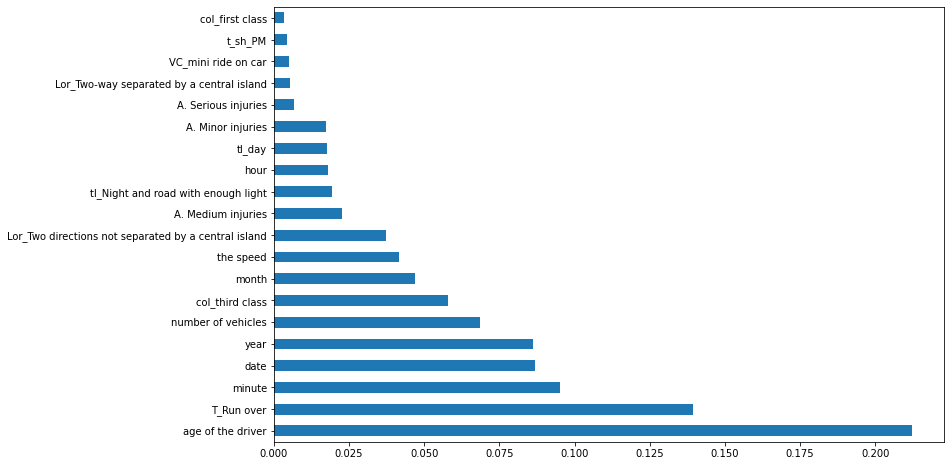

In [152]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [153]:
# largest_imp_5=list(feat_importances.nlargest(5).keys())
# largest_imp_5

In [154]:
# X=df[largest_imp_5]

In [155]:
X.columns

Index(['the speed', 'A. Minor injuries', 'A. Serious injuries',
       'A. Medium injuries', 'number of vehicles', 'age of the driver',
       'month', 'year', 'date', 'hour', 'minute', 'T_Run over', 'T_shocked',
       'Lor_Two directions not separated by a central island',
       'Lor_Two-way separated by a central island', 'Lor_inside garage',
       'Lor_public squares', 'rs_dry', 'rs_icy', 'rs_sandy', 'rs_snowy',
       'VN_Israel', 'VN_Jordan', 'VN_Kuwait', 'VN_Lebanon', 'VN_Libya',
       'VN_Saudi', 'VN_Syria', 'VN_United State', 'col_Degree',
       'col_Fifth class', 'col_Sixth Class (A + B)', 'col_Sixth class (A)',
       'col_Sixth class (B)', 'col_Unidentified/Unidentified Driver',
       'col_first class', 'col_fourth class', 'col_third class',
       'col_third class automatic', 'rt_cement', 'rt_earthy',
       'tl_Night and road with enough light', 'tl_Sunset', 'tl_darkness',
       'tl_day', 'th_rain', 'th_snow', 'th_stormy winds', 'rp_flat curve',
       'rp_flat stra

In [156]:
len(X.columns)

60

In [157]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.78367484, -0.13157567, -0.02781536, ..., -0.07636778,
         0.43711342,  0.62638437],
       [-0.78367484, -0.13157567, -0.02781536, ..., -0.07636778,
         0.43711342,  0.62638437],
       [-0.78367484, -0.13157567, -0.02781536, ..., -0.07636778,
         0.43711342,  0.62638437],
       ...,
       [ 1.20393969, -0.13157567, -0.02781536, ..., -0.07636778,
         0.43711342,  0.62638437],
       [ 1.20393969, -0.13157567, -0.02781536, ..., -0.07636778,
        -2.28773577,  0.62638437],
       [ 1.20393969, -0.13157567, -0.02781536, ..., -0.07636778,
        -2.28773577,  0.62638437]])

In [158]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
model_scoring={}
def all_model_scores(model,X,y):
    scores=cross_val_score(model,X,y,cv=10)
    mean_score=scores.mean()
    model_scoring.update({model:mean_score})
    return model_scoring

Model_list=[DecisionTreeClassifier(),LogisticRegression(solver='lbfgs', max_iter=1000),RandomForestClassifier(),SVC()]
for model in Model_list:
    score_dict=all_model_scores(model,X_scaled,y)
df_Models_scores=pd.DataFrame(score_dict,index=[0])
df_Models_scores

c:\users\sk\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
c:\users\sk\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
c:\users\sk\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
c:\users\sk\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10

,DecisionTreeClassifier(),LogisticRegression(max_iter=1000),RandomForestClassifier(),SVC()
0,0.996908,0.998069,0.998456,0.998456


In [160]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,random_state=42)

In [161]:
# As Random Forest and logistic regression perform at high accuracy so i choose one of them

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=1000)

# from sklearn.svm import SVC
# model = SVC()

# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier()

model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [162]:
# import pickle
# pickle.dump(model, open('model_Heart_desease_prediction.pkl','wb'))

In [163]:
model.score(X_train,y_train)

0.9995166747220879

In [164]:
model.score(X_test,y_test)

0.9980694980694981

In [76]:
model.predict(X_test[:5])

array([0, 0, 0, 0, 0], dtype=int64)

In [77]:
from sklearn import metrics
y_predicted=model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted))
print("Precision:",metrics.precision_score(y_test, y_predicted))
print("Recall:",metrics.recall_score(y_test, y_predicted))

from sklearn import metrics
score=metrics.accuracy_score(y_test,y_predicted)
pre=metrics.precision_score(y_test, y_predicted)
recall=metrics.recall_score(y_test, y_predicted)
f1_score=2*pre*recall/(pre+recall)
print("F1_score:",f1_score)

Accuracy: 0.9980694980694981
Precision: 0.0
Recall: 0.0
F1_score: nan


c:\users\sk\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sk\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-77-4774b3fad0b6>:11: RuntimeWarning: invalid value encountered in double_scalars
  f1_score=2*pre*recall/(pre+recall)


In [78]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
print(cm)

[[517   0]
 [  1   0]]


Text(69.0, 0.5, 'Truth')

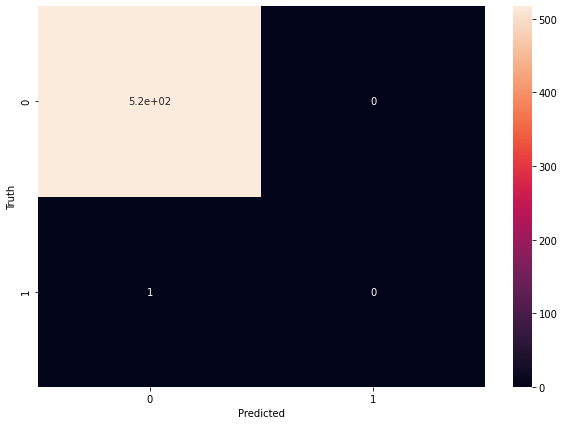

In [79]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [80]:
from sklearn.metrics import classification_report

In [81]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       517
           1       0.00      0.00      0.00         1

    accuracy                           1.00       518
   macro avg       0.50      0.50      0.50       518
weighted avg       1.00      1.00      1.00       518



c:\users\sk\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sk\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sk\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [82]:
from sklearn.decomposition import PCA

pca = PCA(0.70)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(2587, 29)

In [83]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [84]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.9961389961389961

In [85]:
from sklearn import linear_model
losso_reg=linear_model.Lasso(alpha=50,max_iter=100,tol=0.1)
losso_reg.fit(X_train,y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [86]:
losso_reg.score(X_test,y_test)

-0.00011984031272538331

c:\users\sk\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
c:\users\sk\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
c:\users\sk\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
c:\users\sk\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  

<AxesSubplot:xlabel='Max_Depth', ylabel='Values'>

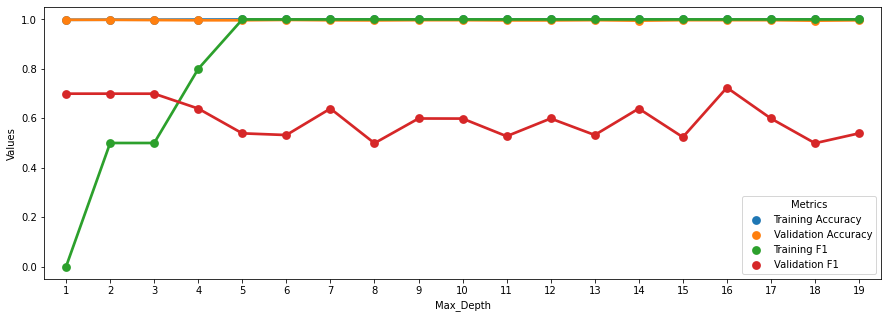

In [166]:
from sklearn.metrics import accuracy_score,f1_score

training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
tree_depths = []

for depth in range(1,20):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    tree_depths.append(depth)
    

Tuning_Max_depth = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Max_Depth": tree_depths }
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

plot_df = Tuning_Max_depth_df.melt('Max_Depth',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Max_Depth", y="Values",hue="Metrics", data=plot_df,ax=ax)